In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as P

In [2]:
info_df = pd.read_csv('train.csv', header=0)

In [3]:
info_df.info()
# Age, Cabin and Embarked are all missing data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# applies a value to gender.
info_df['Gender'] = info_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [5]:
info_df['Family Size'] = info_df['SibSp'] + info_df['Parch'] + 1

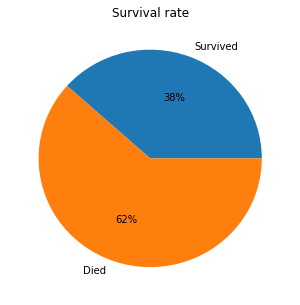

In [6]:
#Fist I just want to plot the overall surival rate
survived = info_df['Survived'].sum()
died = 891 - survived

plt.figure(figsize = (5,5))
plt.pie([survived,died],labels=['Survived','Died'],autopct='%1.0f%%')
plt.title('Survival rate')

plt.show()

This pie chart just shows the general survival rate of all of the passengers. 

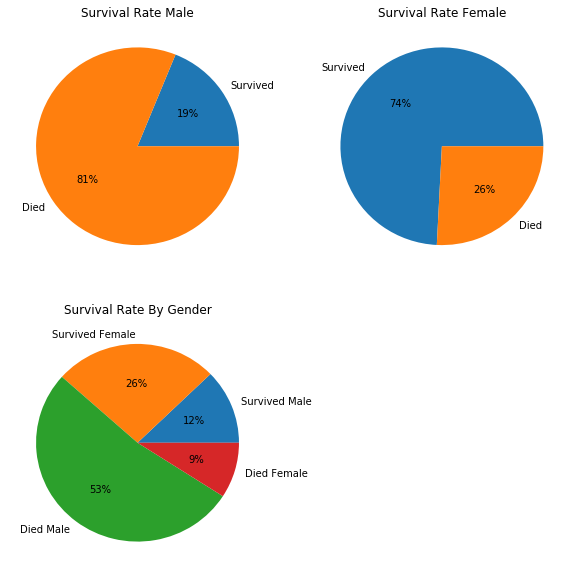

In [7]:
#Then I wanted to spilt up the survial rates into male and female.
survived_df = info_df[info_df['Survived']==1]
died_df = info_df[info_df['Survived']==0]
survived_male = survived_df['Gender'][survived_df['Gender']==1].count()
died_male = died_df['Gender'][died_df['Gender']==1].count()
survived_female = survived_df['Gender'][survived_df['Gender']==0].count()
died_female = died_df['Gender'][died_df['Gender']==0].count()

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.pie([survived_male,died_male],labels=['Survived','Died'],autopct='%1.0f%%')
plt.title('Survival Rate Male')

plt.subplot(222)
plt.pie([survived_female,died_female],labels=['Survived','Died'],autopct='%1.0f%%')
plt.title('Survival Rate Female')

plt.subplot(223)
plt.pie([survived_male,survived_female,died_male,died_female],labels=['Survived Male','Survived Female','Died Male','Died Female'],autopct='%1.0f%%')
plt.title('Survival Rate By Gender')

plt.show()

From these pie chats you can clearly see that the chance of survival was dramitically higher for Female passengers. 

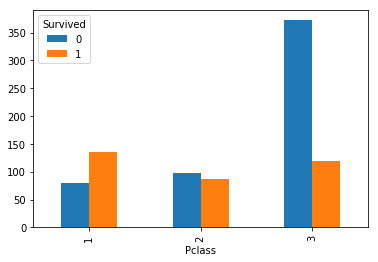

In [8]:
#Now I am going to look into how the class of the passenger would change the chance of survival. 
female_df = info_df[info_df['Sex']=='female']
male_df = info_df[info_df['Sex']=='male']

pd.crosstab(info_df["Pclass"],info_df["Survived"]).plot(kind="bar")
plt.show()

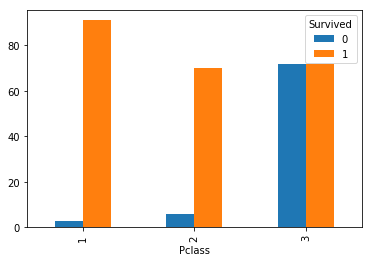

In [9]:
pd.crosstab(female_df["Pclass"],female_df["Survived"]).plot(kind="bar")
plt.show()

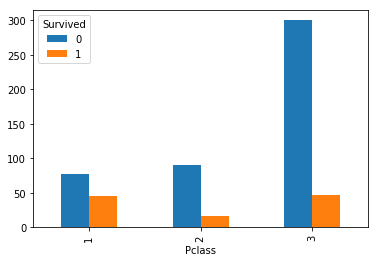

In [10]:
pd.crosstab(male_df["Pclass"],male_df["Survived"]).plot(kind="bar")
plt.show()

Looking into call there does apeare to be seems to be a large correlation between female survivability and class with nearly all 1st and 2nd class female passengers being able to survive.

As esstablished earlier there were some age gaps missing in the data. I decided that it wouldn't be correct to try and guess the ages of these people so I decided that the best action would be to remove them from the dataset for any age analysis. 

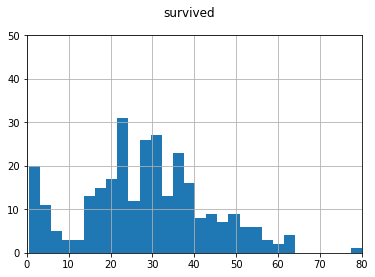

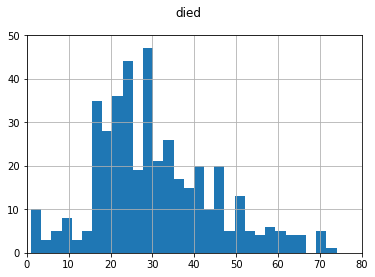

In [11]:
#these two graphs show survival related to age.
survived_df.Age.hist(bins=30)
P.suptitle('survived')
#I used these to set the size of the graphs so that they can be more easily compared. 
plt.ylim(ymax = 50, ymin = 0)
plt.xlim(xmax = 80, xmin = 0)
plt.show()
died_df.Age.hist(bins=30)
P.suptitle('died')
plt.ylim(ymax = 50, ymin = 0)
plt.xlim(xmax = 80, xmin = 0)
plt.show()

The main informationf that you can take from these historgram are that you had a hig chance of survival being very young and a much lower chance of survival in the 15-50 range.

Next I wanted to look at how family size might effect your chance of survivng. I added family size early on in the script. 

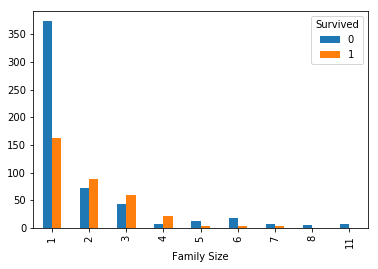

In [13]:
pd.crosstab(info_df["Family Size"],info_df["Survived"]).plot(kind='bar')
plt.show()

From this there seems to be very little correlation in family size and chance of survival. 

### Conclusion
From all of the analysis above we can see that the main things that increase your survivability onboard the titanic were your gender, female being the better. Being younger, belowe aronnd 5. And your class, having a higher ticket increase your chances. 